In [3]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Load the data
df = pd.read_csv("Data_Timbulan_Sampah_SIPSN_KLHK.csv")

# Display the first few rows of the dataset
df.head()

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2023,Aceh,Kab. Aceh Selatan,96.78,"35,323.53"
1,2023,Aceh,Kab. Aceh Tenggara,114.15,"41,666.21"
2,2023,Aceh,Kab. Aceh Barat,100.86,"36,813.72"
3,2023,Aceh,Kab. Aceh Besar,148.09,"54,053.29"
4,2023,Aceh,Kab. Simeulue,45.14,"16,476.21"


In [5]:
# Show general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Tahun                         1255 non-null   int64 
 1   Provinsi                      1255 non-null   object
 2   Kabupaten/Kota                1255 non-null   object
 3   Timbulan Sampah Harian(ton)   1255 non-null   object
 4   Timbulan Sampah Tahunan(ton)  1255 non-null   object
dtypes: int64(1), object(4)
memory usage: 49.2+ KB


In [6]:
# Check for missing values
df.isnull().sum()

Tahun                           0
Provinsi                        0
Kabupaten/Kota                  0
Timbulan Sampah Harian(ton)     0
Timbulan Sampah Tahunan(ton)    0
dtype: int64

In [7]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Tahun, Provinsi, Kabupaten/Kota, Timbulan Sampah Harian(ton), Timbulan Sampah Tahunan(ton)]
Index: []


In [8]:
# Count the number of provinces per year
provinces_per_year = df.groupby('Tahun')['Provinsi'].nunique()

# Tampilkan hasil
print(provinces_per_year)

Tahun
2018     1
2019    34
2020    36
2021    38
2022    37
2023    36
Name: Provinsi, dtype: int64


In [9]:
df = df.drop(df[df['Tahun'] == 2018].index)
print(df)

      Tahun          Provinsi         Kabupaten/Kota  \
0      2023              Aceh      Kab. Aceh Selatan   
1      2023              Aceh     Kab. Aceh Tenggara   
2      2023              Aceh        Kab. Aceh Barat   
3      2023              Aceh        Kab. Aceh Besar   
4      2023              Aceh          Kab. Simeulue   
...     ...               ...                    ...   
1249   2019      Maluku Utara  Kota Tidore Kepulauan   
1250   2019             Papua       Kab. Biak Numfor   
1251   2019             Papua          Kota Jayapura   
1252   2019     Papua Selatan             Kab. Asmat   
1253   2019  Papua Barat Daya        Kab. Raja Ampat   

     Timbulan Sampah Harian(ton) Timbulan Sampah Tahunan(ton)  
0                          96.78                    35,323.53  
1                         114.15                    41,666.21  
2                         100.86                    36,813.72  
3                         148.09                    54,053.29  
4      

In [10]:
# Remove commas from numerical values and convert to float
df['Timbulan Sampah Harian(ton)'] = df['Timbulan Sampah Harian(ton)'].str.replace(",", "").astype(float)
df['Timbulan Sampah Tahunan(ton)'] = df['Timbulan Sampah Tahunan(ton)'].str.replace(",", "").astype(float)

In [11]:
# 1. Total annual waste generation in each province in each year
total_annual_waste = df.groupby(['Tahun', 'Provinsi'])['Timbulan Sampah Tahunan(ton)'].sum().reset_index()
total_annual_waste.head()

,Tahun,Provinsi,Timbulan Sampah Tahunan(ton)
0,2019,Aceh,254830.94
1,2019,Bali,797720.94
2,2019,Banten,2425292.19
3,2019,Bengkulu,145167.80
4,2019,D.I. Yogyakarta,783652.45


In [12]:
# 2. Average total annual waste generation in each province for all years
average_annual_waste = total_annual_waste.groupby('Provinsi')['Timbulan Sampah Tahunan(ton)'].mean().reset_index()
average_annual_waste['Timbulan Sampah Tahunan(ton)'] = average_annual_waste['Timbulan Sampah Tahunan(ton)'].round(3)
print(average_annual_waste)

                     Provinsi  Timbulan Sampah Tahunan(ton)
0                        Aceh                    362484.734
1                        Bali                    946382.616
2                      Banten                   1738484.502
3                    Bengkulu                     99878.102
4             D.I. Yogyakarta                    531841.040
5                 DKI Jakarta                   2734347.084
6                   Gorontalo                     90688.958
7                       Jambi                    265921.610
8                  Jawa Barat                   3641283.866
9                 Jawa Tengah                   4527590.120
10                 Jawa Timur                   4691367.970
11           Kalimantan Barat                    488165.972
12         Kalimantan Selatan                    620292.566
13          Kalimantan Tengah                    348210.116
14           Kalimantan Timur                    678114.254
15           Kalimantan Utara           

In [13]:
# 3. Province that produces the most annual waste generation each year
most_annual_waste_province = total_annual_waste.loc[total_annual_waste.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmax()]
print(most_annual_waste_province)

     Tahun     Provinsi  Timbulan Sampah Tahunan(ton)
10    2019   Jawa Timur                    5413713.50
43    2020  Jawa Tengah                    4236201.24
79    2021  Jawa Tengah                    5021888.22
117   2022  Jawa Tengah                    5904061.08
155   2023   Jawa Timur                    4509970.46


In [14]:
# 4. Province that produces the least annual waste generation each year
least_annual_waste_province = total_annual_waste.loc[total_annual_waste.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmin()]
print(least_annual_waste_province)

     Tahun          Provinsi  Timbulan Sampah Tahunan(ton)
23    2019  Papua Barat Daya                      12090.99
60    2020     Papua Selatan                      16075.33
95    2021  Papua Barat Daya                      12310.72
133   2022  Papua Barat Daya                      18162.69
160   2023  Kalimantan Utara                       5234.83


C:\Users\Osaraku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Osaraku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


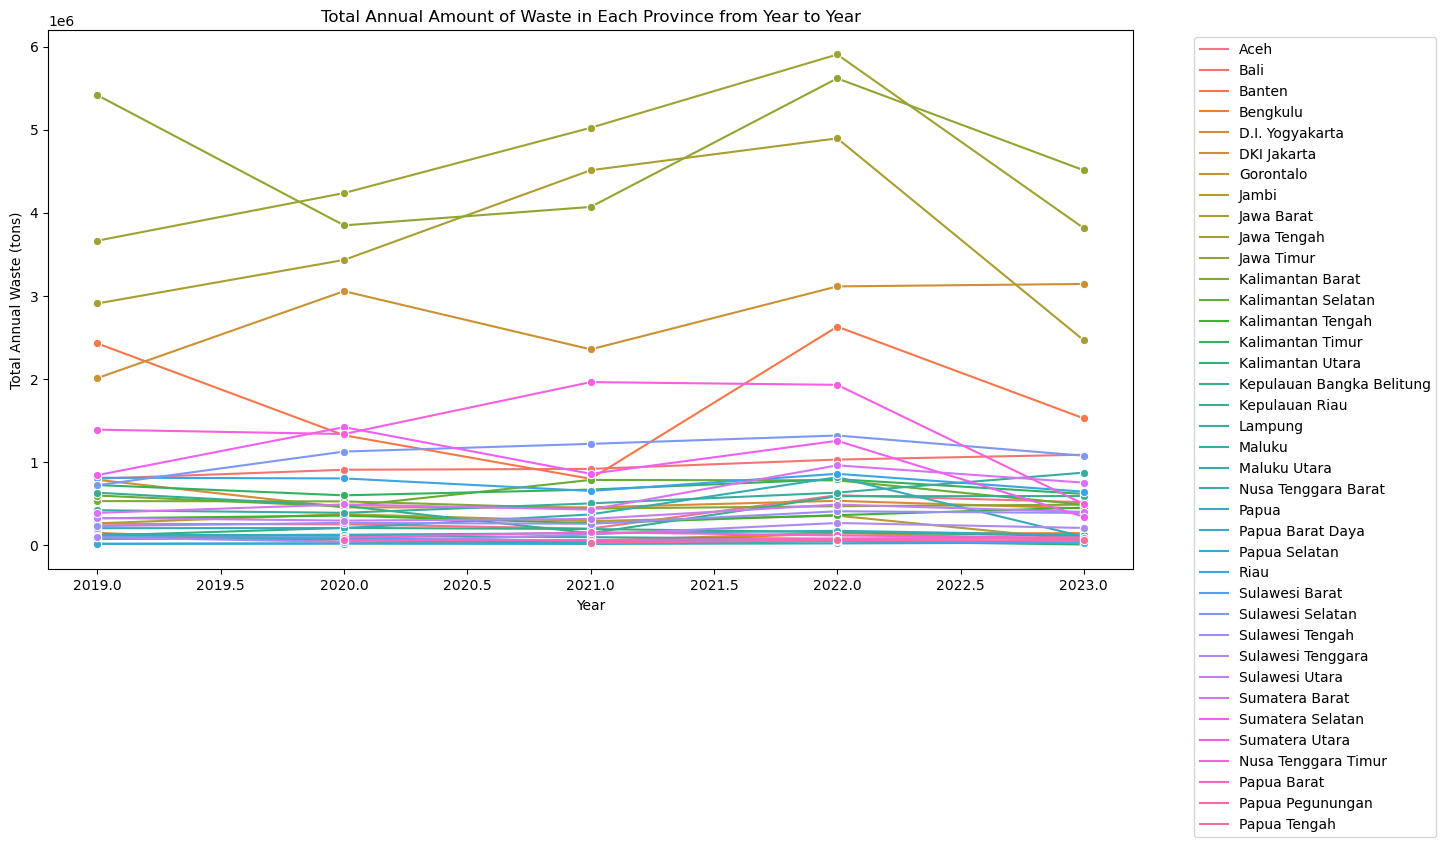

In [15]:
# 5. Graph of the total annual amount of waste in each province from year to year
plt.figure(figsize=(14, 7))
sns.lineplot(data=total_annual_waste, x='Tahun', y='Timbulan Sampah Tahunan(ton)', hue='Provinsi', marker='o')
plt.title('Total Annual Amount of Waste in Each Province from Year to Year')
plt.ylabel('Total Annual Waste (tons)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

                     Provinsi  Timbulan Sampah Tahunan(ton) Category
0                        Aceh                    362484.734   ORANGE
1                        Bali                    946382.616      RED
2                      Banten                   1738484.502      RED
3                    Bengkulu                     99878.102    GREEN
4             D.I. Yogyakarta                    531841.040   ORANGE
5                 DKI Jakarta                   2734347.084      RED
6                   Gorontalo                     90688.958    GREEN
7                       Jambi                    265921.610   ORANGE
8                  Jawa Barat                   3641283.866      RED
9                 Jawa Tengah                   4527590.120      RED
10                 Jawa Timur                   4691367.970      RED
11           Kalimantan Barat                    488165.972   ORANGE
12         Kalimantan Selatan                    620292.566   ORANGE
13          Kalimantan Tengah     

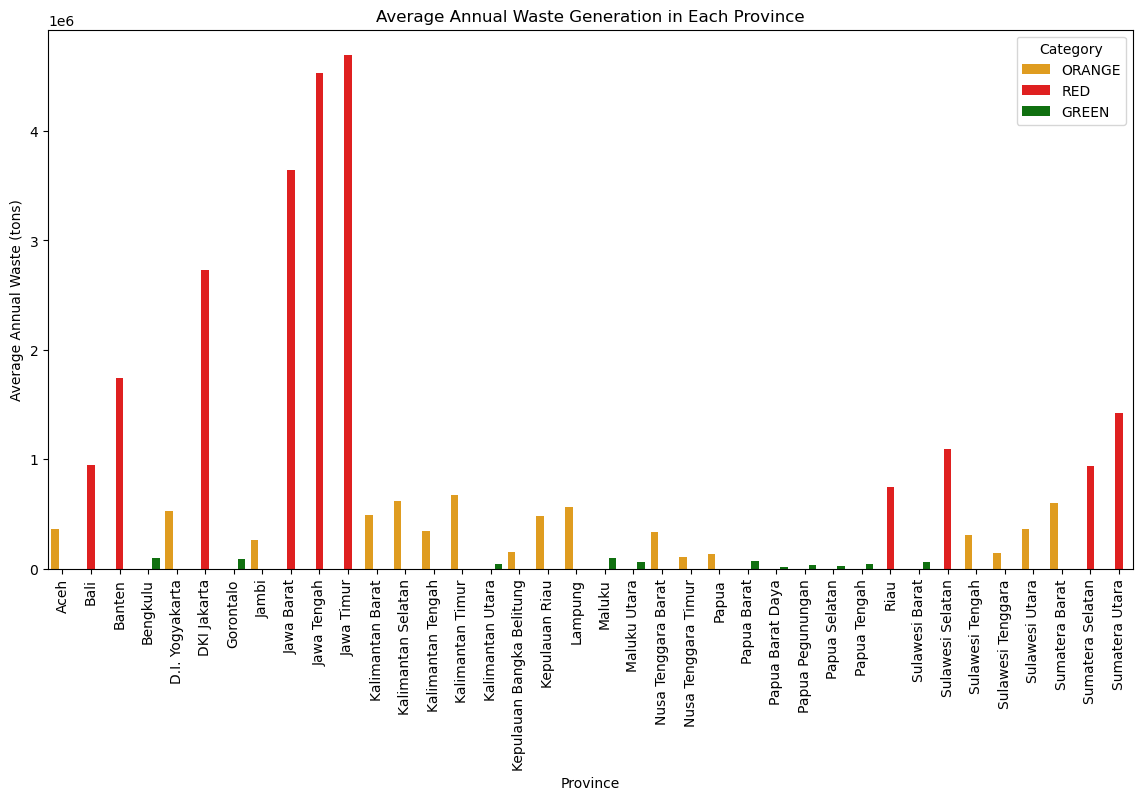

In [16]:
# 6. Categorization and visualization of average annual waste in each province for the entire year
def categorize_waste(amount):
    if amount <= 100000:
        return 'GREEN'
    elif 100000 < amount <= 700000:
        return 'ORANGE'
    else:
        return 'RED'

average_annual_waste['Category'] = average_annual_waste['Timbulan Sampah Tahunan(ton)'].apply(categorize_waste)
print(average_annual_waste)

plt.figure(figsize=(14, 7))
sns.barplot(data=average_annual_waste, x='Provinsi', y='Timbulan Sampah Tahunan(ton)', hue='Category', palette={'GREEN':'green', 'ORANGE':'orange', 'RED':'red'})
plt.title('Average Annual Waste Generation in Each Province')
plt.ylabel('Average Annual Waste (tons)')
plt.xlabel('Province')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.show()


In [17]:
!pip3 install Flask
!pip install Python-IO
!pip install pybase64

In [ ]:
# 7. Flask-based web application
!pip3 install Flask
!pip install Python-IO
!pip install pybase64
from flask import Flask, render_template
from io import BytesIO
from io import StringIO
import base64

app = Flask(__name__, template_folder='templates') 

@app.route("/")
def dashboard():
    # Save the plots as static images
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=total_annual_waste, x='Tahun', y='Timbulan Sampah Tahunan(ton)', hue='Provinsi', marker='o')
    plt.title('Total Annual Amount of Waste in Each Province from Year to Year')
    plt.ylabel('Total Annual Waste (tons)')
    plt.xlabel('Year')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('static/total_annual_waste.png')
    plt.close()
    
    plt.figure(figsize=(14, 7))
    sns.barplot(data=average_annual_waste, x='Provinsi', y='Timbulan Sampah Tahunan(ton)', hue='Category', palette={'GREEN':'green', 'ORANGE':'orange', 'RED':'red'})
    plt.title('Average Annual Waste Generation in Each Province')
    plt.ylabel('Average Annual Waste (tons)')
    plt.xlabel('Province')
    plt.xticks(rotation=90)
    plt.legend(title='Category')
    plt.savefig('static/average_annual_waste.png')
    plt.close()

    return render_template('index.html', plot_url_1='/static/total_annual_waste.png', plot_url_2='/static/average_annual_waste.png')
    
# Run the Flask app
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\Users\Osaraku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Osaraku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
127.0.0.1 - - [07/Jul/2024 08:02:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Jul/2024 08:02:14] "GET /static/total_annual_waste.png HTTP/1.1" 200 -
127.0.0.1 - - [07/Jul/2024 08:02:14] "GET /static/average_annual_waste.png HTTP/1.1" 200 -
